# Office Supplies Data Analysis

## Sales Analysis

In [1]:

import pandas as pd

# Load the dataset
file_path = '/content/P2- OfficeSupplies Data.csv'
data = pd.read_csv(file_path)

# Convert OrderDate to datetime format
data['OrderDate'] = pd.to_datetime(data['OrderDate'], format='%d-%b-%y')

# Calculate total sales for each product category
data['Total Sales'] = data['Units'] * data['Unit Price']
category_sales = data.groupby('Item')['Total Sales'].sum().reset_index()

# Display total sales for each product category
category_sales


,Item,Total Sales
0,Binder,9577.65
1,Desk,1700.00
2,Pen,2045.22
3,Pen Set,4169.87
4,Pencil,2135.14


### Product Category with the Highest Sales

In [2]:

# Product category with the highest sales
top_category = category_sales.loc[category_sales['Total Sales'].idxmax()]
top_category


Item            Binder
Total Sales    9577.65
Name: 0, dtype: object

### Top 10 Best-Selling Products

In [3]:

# Top 10 best-selling products
best_selling_products = data.groupby('Item')['Units'].sum().reset_index().sort_values(by='Units', ascending=False).head(10)
best_selling_products


,Item,Units
0,Binder,722
4,Pencil,716
3,Pen Set,395
2,Pen,278
1,Desk,10


## Customer Analysis

In [4]:

# Calculate total sales for each representative (acting as customer)
rep_sales = data.groupby('Rep')['Total Sales'].sum().reset_index()

# Top 10 customers by sales
top_customers = rep_sales.sort_values(by='Total Sales', ascending=False).head(10)
top_customers


,Rep,Total Sales
3,Matthew,3109.44
9,Susan,3102.30
0,Alex,2812.19
7,Richard,2363.04
1,Bill,1749.87
8,Smith,1641.43
4,Morgan,1387.77
2,James,1283.61
10,Thomas,1203.11
5,Nick,536.75


### Total Number of Unique Customers

In [5]:

# Total number of unique customers
unique_customers = data['Rep'].nunique()
unique_customers


11

### Customer Purchase Frequency

In [6]:

# Customer purchase frequency
purchase_frequency = data['Rep'].value_counts().reset_index()
purchase_frequency.columns = ['Rep', 'Purchase Frequency']
purchase_frequency


,Rep,Purchase Frequency
0,Richard,8
1,Bill,5
2,Alex,5
3,Matthew,4
4,James,4
5,Rachel,4
6,Morgan,3
7,Susan,3
8,Smith,3
9,Nick,2


## Time Series Analysis

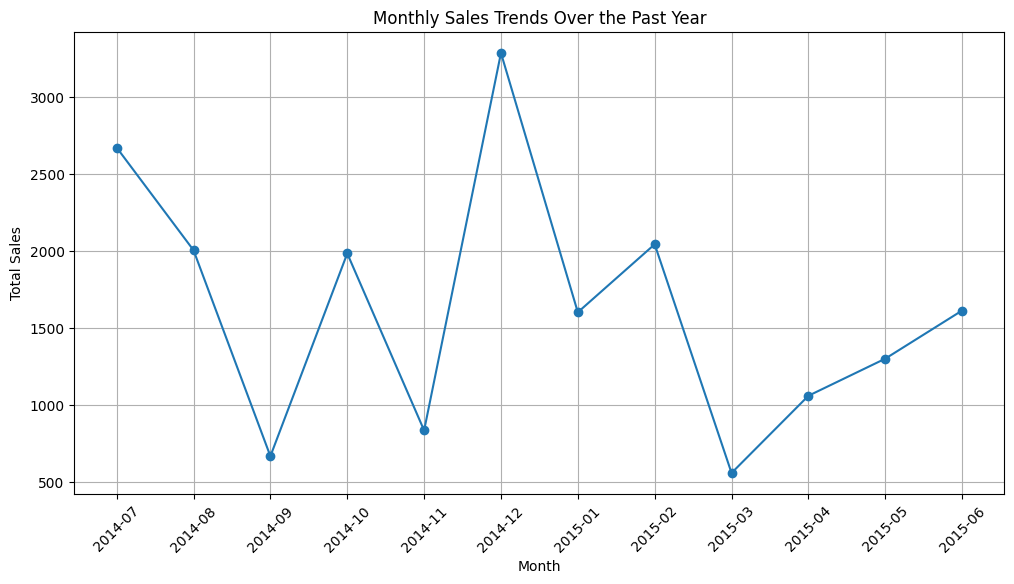

In [7]:

import matplotlib.pyplot as plt

# Extract month and year from OrderDate
data['Month'] = data['OrderDate'].dt.to_period('M')

# Monthly sales trends over the past year
monthly_sales = data.groupby('Month')['Total Sales'].sum().reset_index()

# Plot the monthly sales trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Total Sales'], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends Over the Past Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Geographical Analysis

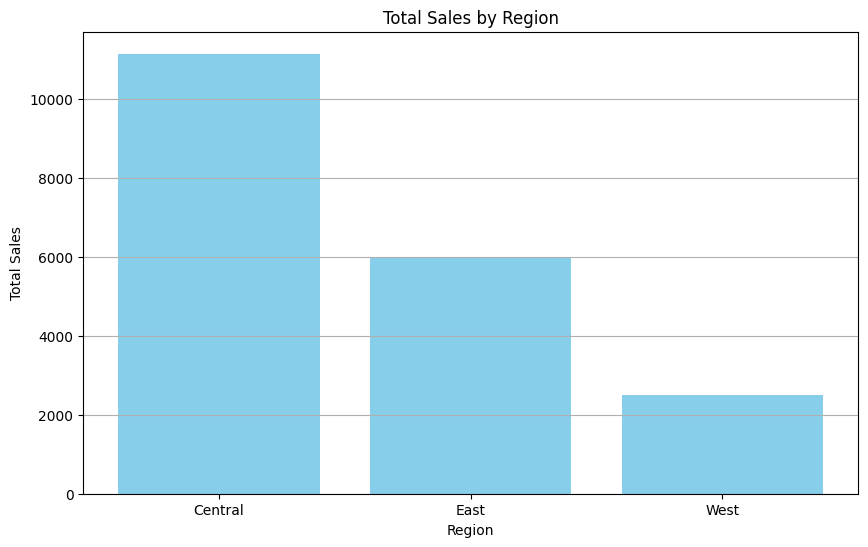

In [8]:

# Calculate total sales for each region
region_sales = data.groupby('Region')['Total Sales'].sum().reset_index()

# Plot the sales by region
plt.figure(figsize=(10, 6))
plt.bar(region_sales['Region'], region_sales['Total Sales'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')
plt.grid(axis='y')
plt.show()


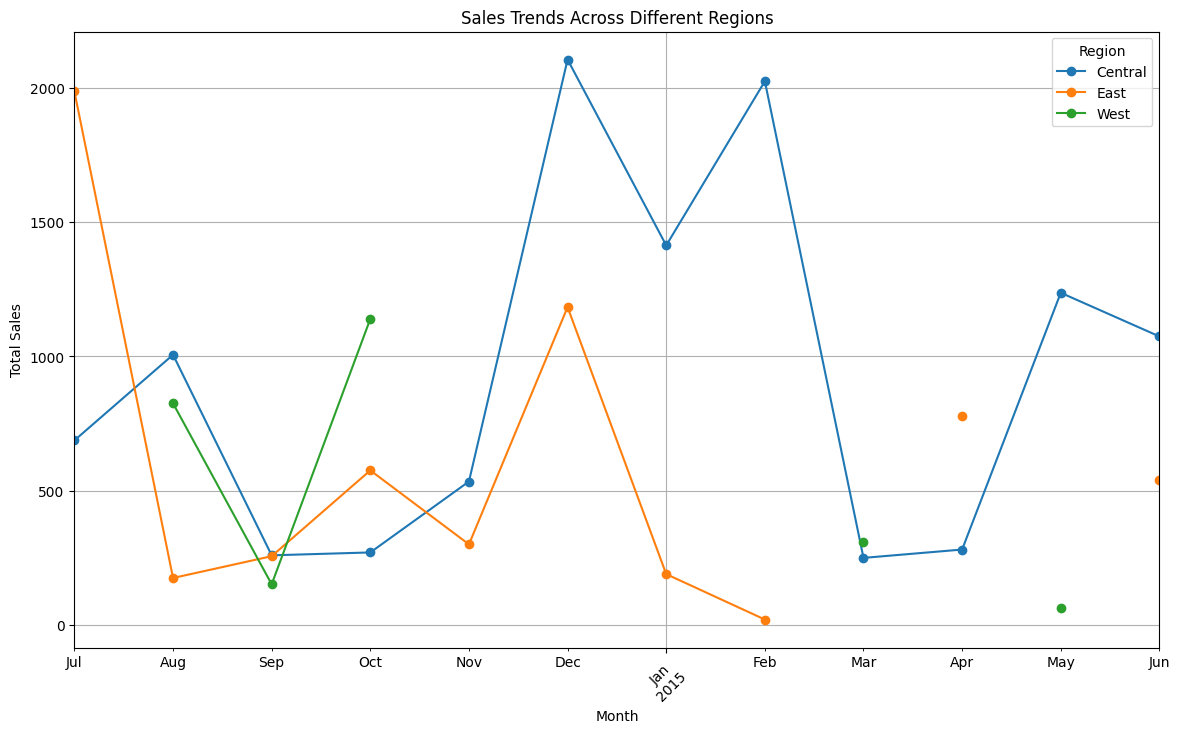

In [9]:

# Sales trends across different regions
monthly_region_sales = data.groupby(['Month', 'Region'])['Total Sales'].sum().unstack().reset_index()

# Plot the sales trends across different regions
monthly_region_sales.plot(x='Month', figsize=(14, 8), marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales Trends Across Different Regions')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Region')
plt.show()


## Profit Analysis

In [10]:

# Assume cost price as 70% of the unit price
data['Cost Price'] = data['Unit Price'] * 0.70

# Calculate profit for each product
data['Profit'] = data['Units'] * (data['Unit Price'] - data['Cost Price'])

# Total profit for each product category
category_profit = data.groupby('Item')['Profit'].sum().reset_index()
category_profit


,Item,Profit
0,Binder,2873.295
1,Desk,510.000
2,Pen,613.566
3,Pen Set,1250.961
4,Pencil,640.542


In [11]:

# Top 10 most profitable products
top_profitable_products = data.groupby('Item')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False).head(10)
top_profitable_products


,Item,Profit
0,Binder,2873.295
3,Pen Set,1250.961
4,Pencil,640.542
2,Pen,613.566
1,Desk,510.000
